In [142]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [144]:
df = pd.read_csv('../dataset/body_level_classification_train.csv')
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [145]:
# show unique values for  Alcohol_Consump column
df['Alcohol_Consump'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

<Figure size 1000x600 with 0 Axes>

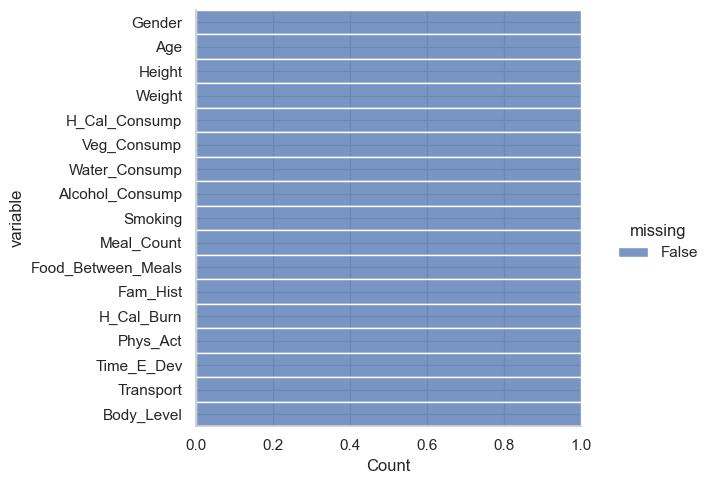

In [146]:
# Visualize null values
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [147]:
print(f"Number of items in the dataset is: {df.shape[0]}")

Number of items in the dataset is: 1477


In [148]:
X = df.drop(['Body_Level'], axis=1)
y = df['Body_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
df = pd.concat([X_train, y_train], axis=1)
df.to_csv('../dataset/train.csv', index=False)
test = pd.concat([X_test, y_test], axis=1)
test.to_csv('../dataset/test.csv', index=False)

In [149]:
print(df.shape)
df.head()

(1107, 17)


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
1456,Male,22.889099,1.792533,116.157766,yes,1.996646,2.000000,Sometimes,no,3.0,Sometimes,yes,no,1.600536,0.739684,Public_Transportation,Body Level 4
858,Female,25.988668,1.621671,105.313967,yes,3.000000,1.042989,Sometimes,no,3.0,Sometimes,yes,no,0.097114,0.429540,Public_Transportation,Body Level 4
381,Female,20.000000,1.600000,50.000000,yes,2.000000,1.000000,no,no,3.0,Sometimes,no,no,0.000000,1.000000,Automobile,Body Level 2
1400,Female,40.702771,1.548403,80.000000,yes,2.000000,1.326165,Sometimes,no,3.0,Sometimes,yes,no,0.000000,0.000000,Automobile,Body Level 4
1105,Female,22.480889,1.605662,82.470375,yes,1.557287,2.371015,Sometimes,no,1.0,Sometimes,yes,no,0.288032,2.000000,Public_Transportation,Body Level 4


In [150]:
print(test.shape)
test.head()

(370, 17)


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
1233,Female,21.768834,1.733383,135.524857,yes,3.000000,1.485736,Sometimes,no,3.000000,Sometimes,yes,no,1.950374,0.869238,Public_Transportation,Body Level 4
529,Male,19.565496,1.705584,78.025625,no,1.936479,2.159987,Sometimes,no,2.837388,Sometimes,yes,no,1.475772,0.646514,Public_Transportation,Body Level 3
1177,Male,18.000000,1.803527,108.251044,yes,2.000000,2.530157,no,no,1.709546,Sometimes,yes,no,1.000000,0.645400,Public_Transportation,Body Level 4
432,Female,21.012569,1.758628,78.370039,yes,3.000000,2.000000,Sometimes,no,1.000000,Sometimes,yes,no,2.971832,0.000000,Public_Transportation,Body Level 3
363,Female,23.000000,1.500000,55.000000,yes,3.000000,2.000000,Sometimes,no,3.000000,Sometimes,yes,no,1.000000,0.000000,Motorbike,Body Level 2


In [151]:
def countPlot(data=None, x=None, y=None, palette='bright', height=15, title=' ', subtitle=' ', description=' '):
    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})
    g = sns.countplot(data=data, y=y, x=x, palette=palette)
    g.set_ylabel(' \n\n\n')
    g.set_xlabel(' \n\n\n\n\n')
    g.set_title(f'\n\n\n\n{title}\n\n'.upper(), loc = 'left', fontdict = dict(fontsize = 15, fontweight = 'bold'))
    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(
            fontsize = 12.5,
            fontweight = 'medium'))
    
    plt.text(s = f'{description}',
             alpha = 0.5,
             x = 0,
             y = -.18,
             verticalalignment = 'baseline',
             horizontalalignment = 'left',
             transform = g.transAxes)
    
    g.bar_label(container = g.containers[0], padding = 10,)
    plt.text(s = ' ', x = 1.08, y = 1, transform = g.transAxes)
    sns.despine()
    return g

def piePlot(data=None, value='Percentage', name='Class', title=' ', subtitle=' ', description=' '):
    data_pie = pd.DataFrame(data.value_counts() / data.shape[0]*100).reset_index()
    data_pie.columns = [name, value]
    fig = px.pie(data_pie, values=value, names=name, title=title)
    fig.update_layout(title=title, title_x=0.48)
    fig.show()

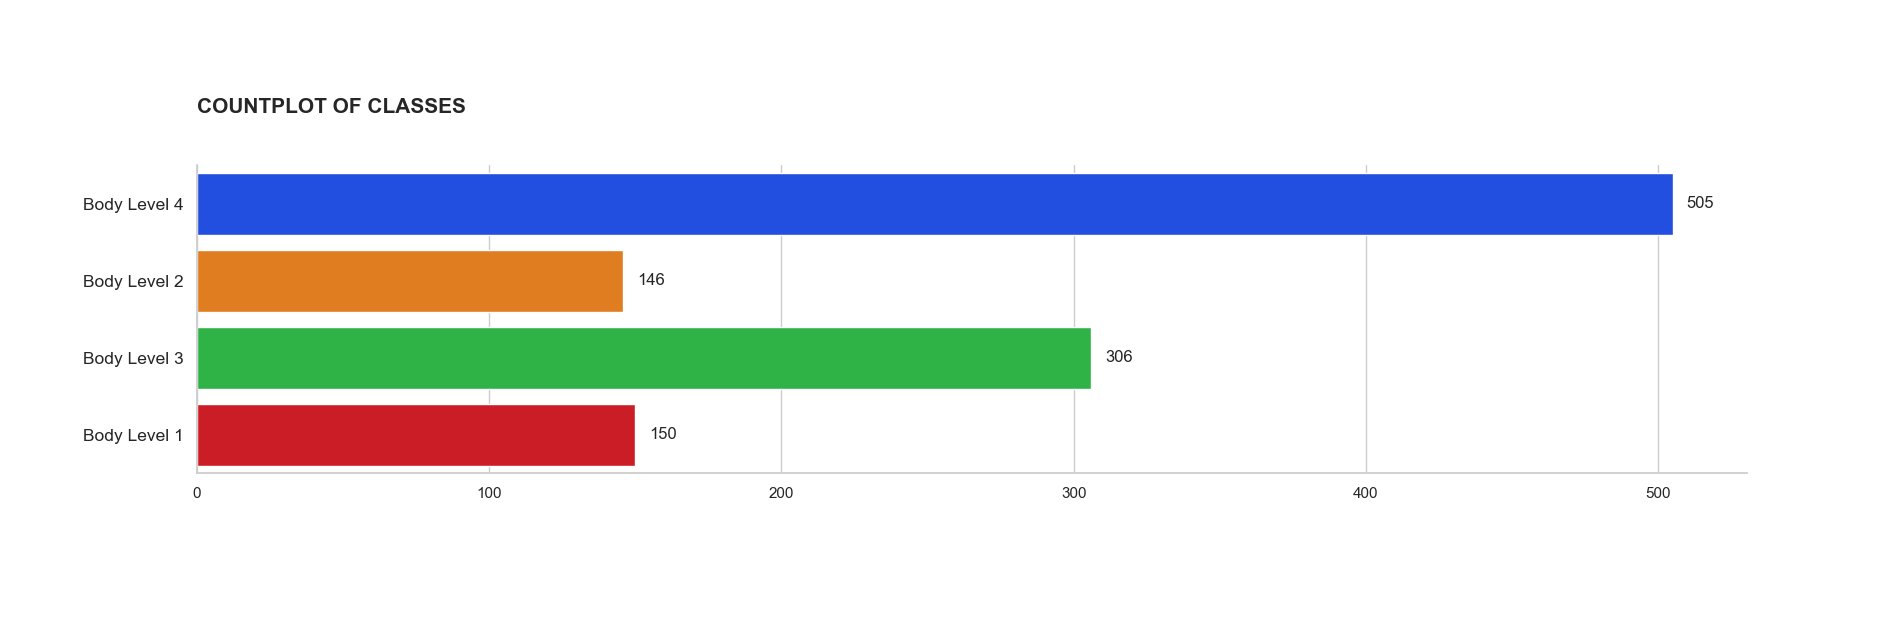

In [152]:
countPlot(y = df['Body_Level'], title = 'Countplot of Classes', height = df['Body_Level'].nunique())
piePlot(data = df['Body_Level'], value = 'Percentage', name = 'Class', title = 'Class Distribution')

In [153]:
cols = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_features_analysis = pd.DataFrame(columns=['Attribute', 'Unique Values'])
for col in cols:
    categorical_features_analysis = categorical_features_analysis.append({'Attribute': col, 'Unique Values': X_train[col].unique()}, ignore_index=True)
categorical_features_analysis

,Attribute,Unique Values
0,Gender,"[Male, Female]"
1,H_Cal_Consump,"[yes, no]"
2,Alcohol_Consump,"[Sometimes, no, Frequently, Always]"
3,Smoking,"[no, yes]"
4,Food_Between_Meals,"[Sometimes, no, Frequently, Always]"
5,Fam_Hist,"[yes, no]"
6,H_Cal_Burn,"[no, yes]"
7,Transport,"[Public_Transportation, Automobile, Bike, Moto..."


In [154]:
cols = X_train.select_dtypes(include=['float64']).columns.tolist()
outlier_analysis = pd.DataFrame(columns=['Attribute', 'Number of Outliers', 'Percentage from Dataset'])

print("IQD outlier analysis")
for col in cols:
    IQD = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQD * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQD * 3)
    num_outliers = len([x for x in X_train[col].values if x < lower_boundary or x > upper_boundary])
    outlier_analysis = outlier_analysis.append({'Attribute': col, 'Number of Outliers': num_outliers, 'Percentage from Dataset': num_outliers / X_train.shape[0] * 100}, ignore_index=True)
    print(f'"{col}" attributes outliers are values less than {lower_boundary} or greater than {upper_boundary}')
    print(f'The number of outliers is {num_outliers}')
    print('-------------------------------------------------------------------------------------------------')

IQD outlier analysis
"Age" attributes outliers are values less than 1.8445299999999918 or greater than 44.116602500000006
The number of outliers is 8
-------------------------------------------------------------------------------------------------
"Height" attributes outliers are values less than 1.2008800000000002 or greater than 2.1973755
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Weight" attributes outliers are values less than -57.26856550000002 or greater than 228.02475400000003
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Veg_Consump" attributes outliers are values less than -1.0 or greater than 6.0
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Water_Consump" attributes outliers are values less than -1.3447520000000004 or greater than 5.

In [155]:
outlier_analysis

,Attribute,Number of Outliers,Percentage from Dataset
0,Age,8,0.722674
1,Height,0,0.000000
2,Weight,0,0.000000
3,Veg_Consump,0,0.000000
4,Water_Consump,0,0.000000
5,Meal_Count,177,15.989160
6,Phys_Act,0,0.000000
7,Time_E_Dev,0,0.000000
